# Imports

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading data

In [91]:
attrition = pd.read_csv('attrition.csv')
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
target = pd.read_csv('test_target.csv')

# Data check

In [92]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmployeeNumber  4449 non-null   int64 
 1   Attrition       4302 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.6+ KB


In [93]:
df2.isnull().sum()

EmployeeNumber                0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Attrition                   147
YearlyIncome                  0
dtype: int64

# EDA

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

In [95]:
data = df1.merge(df2)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

In [97]:
data.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,...,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,...,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,...,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [109]:
# CSV jako archiwum, dane z df1.csv + df2.csv
data.to_csv('data.csv')

In [99]:
train_df = data.loc[data['Attrition'].notnull()]

In [100]:
train_df

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [101]:
train_df.isna().sum()

EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [102]:
print(train_df[train_df['NumCompaniesWorked'] == 0])

      EmployeeNumber   Age     BusinessTravel  DailyRate   
7                351  42.0      Travel_Rarely      269.0  \
8                555  34.0  Travel_Frequently      296.0   
13               724  38.0      Travel_Rarely      827.0   
14              1671  32.0      Travel_Rarely      977.0   
16              1778  43.0      Travel_Rarely      244.0   
...              ...   ...                ...        ...   
4410            7941  33.0      Travel_Rarely      213.0   
4411            7942  33.0      Travel_Rarely      213.0   
4412            7943  33.0      Travel_Rarely      213.0   
4438            7969  41.0      Travel_Rarely      582.0   
4439            7970  41.0      Travel_Rarely      582.0   

                  Department  DistanceFromHome  Education EducationField   
7     Research & Development               2.0        3.0        Medical  \
8                      Sales               6.0        2.0      Marketing   
13    Research & Development               1.0     

In [103]:
train_df['YearsAtCompany'].describe()

count    4302.000000
mean      312.854719
std      1373.999529
min         0.000000
25%         3.000000
50%         5.000000
75%        10.000000
max      9984.000000
Name: YearsAtCompany, dtype: float64

In [104]:
print(train_df[train_df['YearsAtCompany'] > 30])

      EmployeeNumber   Age     BusinessTravel  DailyRate   
92               374  55.0      Travel_Rarely      452.0  \
353              131  58.0      Travel_Rarely      682.0   
356              259  52.0      Travel_Rarely      699.0   
361              165  58.0      Travel_Rarely      147.0   
382             1572  53.0      Travel_Rarely      607.0   
...              ...   ...                ...        ...   
4369            7900  33.0      Travel_Rarely     1242.0   
4370            7901  33.0      Travel_Rarely     1242.0   
4405            7936  38.0  Travel_Frequently      148.0   
4433            7964  37.0      Travel_Rarely      921.0   
4434            7965  37.0      Travel_Rarely      921.0   

                  Department  DistanceFromHome  Education    EducationField   
92    Research & Development               1.0        3.0           Medical  \
353                    Sales              10.0        4.0           Medical   
356   Research & Development              

In [111]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4302 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   BusinessTravel            4302 non-null   object 
 3   DailyRate                 4302 non-null   float64
 4   Department                4302 non-null   object 
 5   DistanceFromHome          4302 non-null   float64
 6   Education                 4302 non-null   float64
 7   EducationField            4302 non-null   object 
 8   EmployeeCount             4302 non-null   float64
 9   EnvironmentSatisfaction   4302 non-null   float64
 10  Gender                    4302 non-null   object 
 11  HourlyRate                4302 non-null   float64
 12  JobInvolvement            4302 non-null   float64
 13  JobLevel                  4302 non-null   float64
 14  JobRole      

In [106]:
def visualize_column_counts_per_class(column_name):
    count = train_df.groupby(['Attrition'])[column_name].value_counts().unstack()
    percentage = train_df.pivot_table(columns=column_name, index='Attrition', values='EmployeeNumberEmployeeNumber', aggfunc='count')
    percentage = percentage.div(percentage.sum(axis=1), axis=0).round(2)

    # Plotting count chart
    fig, ax = plt.subplots(1, 2)
    count.plot(kind='bar', ax=ax[0], figsize=(15, 5))

    # Plotting percentage chart
    percentage.plot(kind='bar', ax=ax[1], figsize=(15, 5), stacked=True)

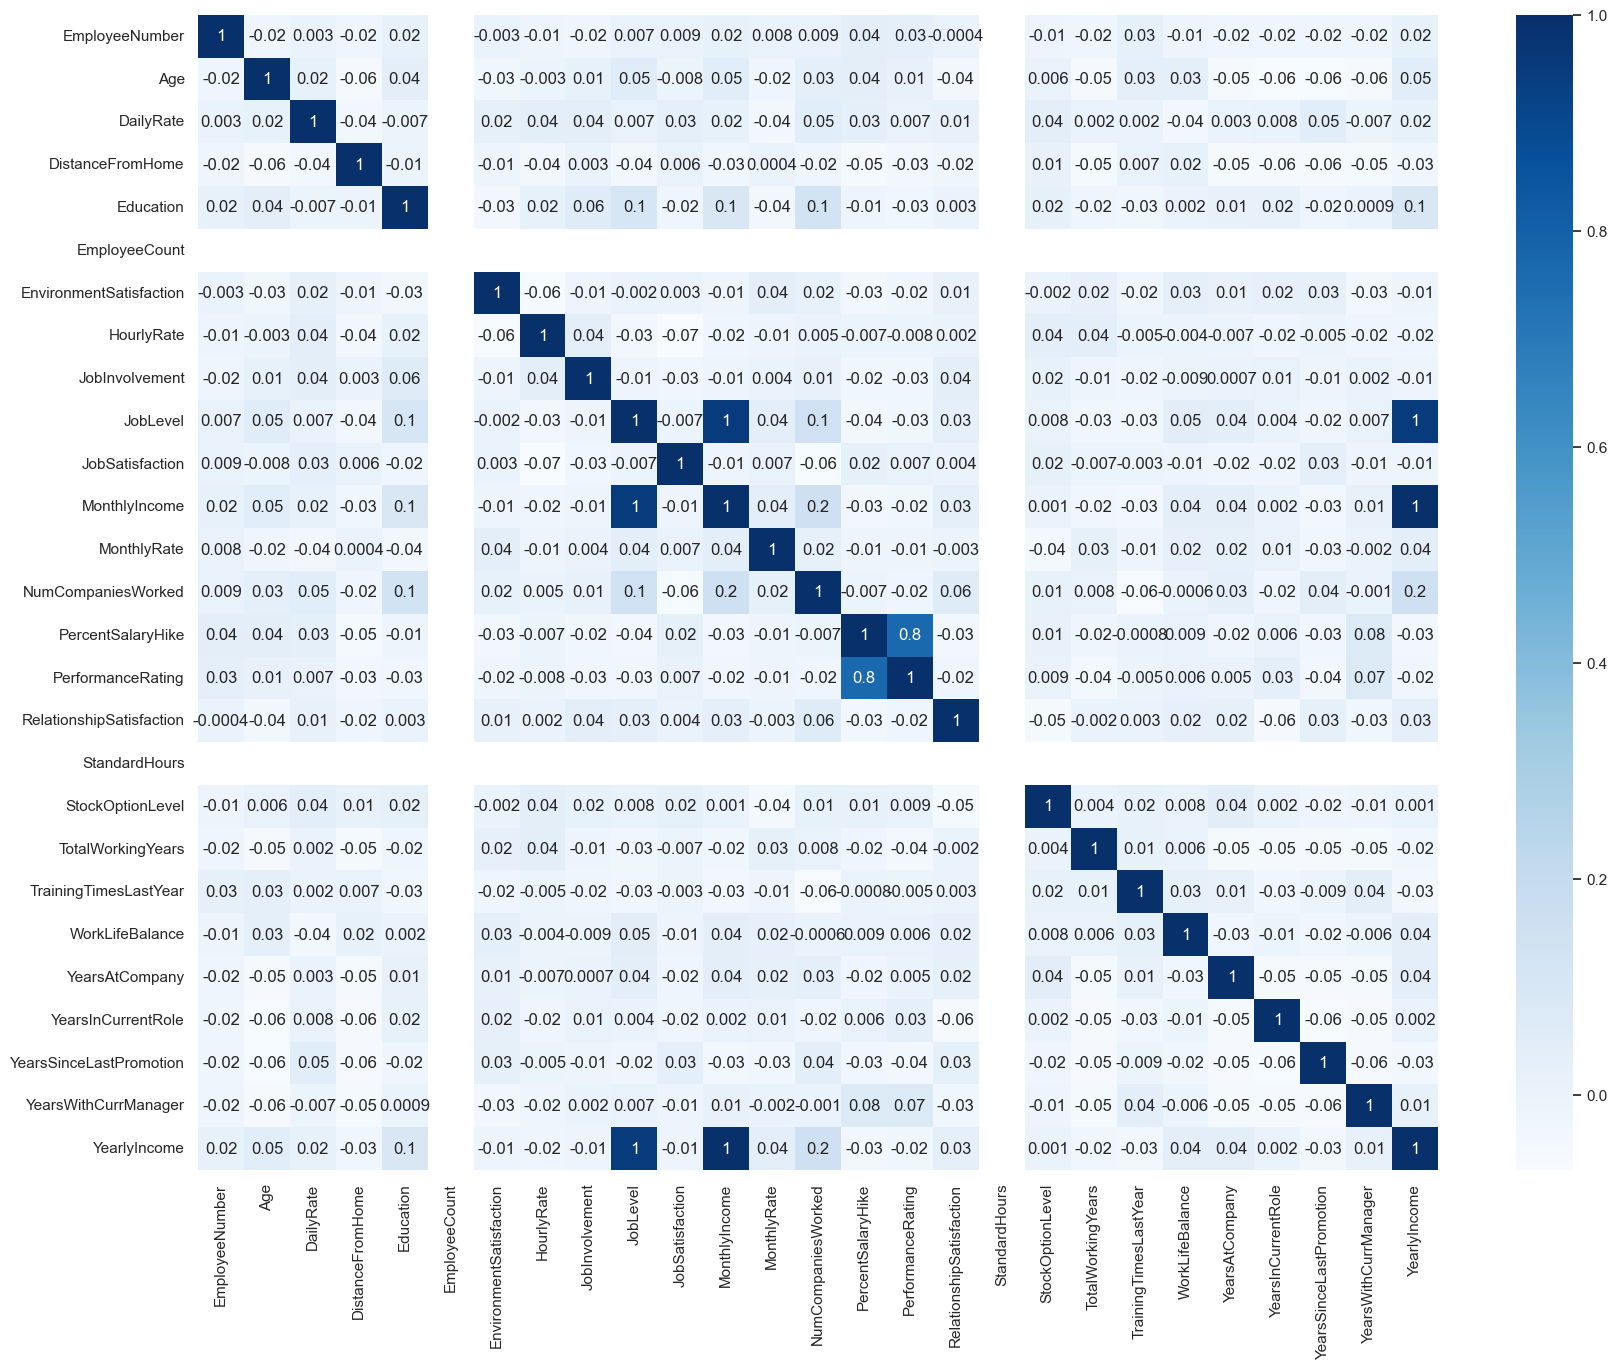

In [107]:
plt.figure(figsize=(20,15))

sns.set_theme(style="white")

corr = data.corr(numeric_only=True)

heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [110]:
train_df.corr(numeric_only=True)

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
EmployeeNumber,1.000000,0.164557,0.001775,0.149258,0.012982,NaN,-0.003653,0.010966,-0.004320,-0.012474,...,NaN,-0.004537,0.138199,0.014177,-0.011019,0.147271,0.148700,0.155693,0.157796,-0.005046
Age,0.164557,1.000000,0.016317,-0.057528,0.036453,NaN,-0.026857,-0.004295,0.014091,0.052980,...,NaN,0.005683,-0.056005,0.030862,0.028957,-0.054925,-0.060362,-0.061487,-0.057187,0.051017
DailyRate,0.001775,0.016317,1.000000,-0.038714,-0.006384,NaN,0.022428,0.041522,0.041827,0.011257,...,NaN,0.033094,0.002495,0.005936,-0.039579,0.003657,0.008255,0.050274,-0.006924,0.019658
DistanceFromHome,0.149258,-0.057528,-0.038714,1.000000,-0.009999,NaN,-0.013636,-0.038817,0.002743,-0.040274,...,NaN,0.011921,-0.053200,0.008211,0.015451,-0.051976,-0.057233,-0.057964,-0.053813,-0.029051
Education,0.012982,0.036453,-0.006384,-0.009999,1.000000,NaN,-0.032020,0.020450,0.060609,0.102246,...,NaN,0.023713,-0.016730,-0.026581,0.003878,0.012736,0.016508,-0.015324,0.001589,0.096832
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,-0.003653,-0.026857,0.022428,-0.013636,-0.032020,NaN,1.000000,-0.060830,-0.010691,-0.003623,...,NaN,-0.003746,0.019756,-0.018001,0.030238,0.014003,0.019469,0.027023,-0.033044,-0.013958
HourlyRate,0.010966,-0.004295,0.041522,-0.038817,0.020450,NaN,-0.060830,1.000000,0.039957,-0.035718,...,NaN,0.037639,0.042889,-0.002630,0.000400,-0.007348,-0.021139,-0.006272,-0.021233,-0.021697
JobInvolvement,-0.004320,0.014091,0.041827,0.002743,0.060609,NaN,-0.010691,0.039957,1.000000,-0.016486,...,NaN,0.015012,-0.013211,-0.024509,-0.011662,0.000095,0.009243,-0.015363,0.001659,-0.015970
JobLevel,-0.012474,0.052980,0.011257,-0.040274,0.102246,NaN,-0.003623,-0.035718,-0.016486,1.000000,...,NaN,0.009962,-0.026670,-0.034538,0.042826,0.043461,0.004149,-0.022169,0.007352,0.950583


In [112]:
train_df['EmployeeCount'].unique()

array([1.])

In [113]:
train_df['StandardHours'].unique()


array([80.])

In [114]:
# Wypisanie wszystkich unikalnych wartości z poszczególnych kolumn
for column in train_df.columns:

    unique_values = train_df[column].unique()

    print(f"Unikalne wartości dla kolumny {column}:")

    print(unique_values)

    print()

Unikalne wartości dla kolumny EmployeeNumber:
[ 104 1638  164 ... 7977 7978 7979]

Unikalne wartości dla kolumny Age:
[  30.   38.   26.   28.   35.   34.   32.   42.   40.   48.   39.   18.
   43.   21.   53.   45.   29.   33.   41.   24.   37.   50.   36.   52.
   47.   31.   49.   54.   44.   22.   46.   27.   55.   59.   25.   23.
   56.   20.   60.   51.   58.   19.   57. 8825. 3628. 6287. 9330. 1107.
 4454. 9155. 9890. 1189. 9195. 9014. 1136. 5582. 2404. 1541. 4510. 4322.
 4988. 8388. 2530. 8901. 2852. 2459. 2982. 4973. 8534. 8314. 4130. 4328.
 7952. 8699. 3147. 8889. 3871. 9531. 8167. 5257. 8136. 7390. 2993. 5672.
 5933. 5614. 5007. 3095. 9219. 6749. 4515. 6715. 1141. 8949. 3636. 4805.
 5959. 9384. 8042. 1423. 7056. 5116. 2667. 8703. 1126. 9612. 7845. 6998.
 1788. 6727. 5377. 5565. 4558. 6506. 4591. 7662. 6510. 4985. 9581. 2095.
 2275. 6399. 4935. 2698. 7617. 9661. 4834. 2242. 1915. 3226. 7924. 9529.
 8326. 1578. 8560. 9078. 6429. 9243. 2186. 2888. 6210. 3388. 2423. 6025.
 1530.